In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [2]:
dataframe=pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv', sep='\t')
df = dataframe

In [3]:
# prompt: write a code in python that calculates the customer's age based on the 'Year_Birth' column - current date. Create a new column to store the results, it is important not to change the order of each customer's age

import datetime

def calculate_age(dfT):
  """
  This function calculates the customer's age based on the 'Year_Birth' column.

  Args:
      df: A pandas DataFrame containing the customer data.

  Returns:
      A pandas DataFrame with a new column named '
      ' containing the calculated ages.
  """

  current_year = datetime.date.today().year
  dfT['Age'] = current_year - dataframe['Year_Birth']
  return dfT

df = calculate_age(dataframe)
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,43


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
## excluindo a coluna IDs
df.drop('ID', axis=1, inplace=True)
## excluindo a coluna  Dt_Customer
df.drop('Dt_Customer', axis=1, inplace=True)

In [6]:
#pegando variavei numericas
# num=[var for var in df.columns if df[var].dtypes!='object' and 'Accepted' not in var and 'Complain' not in var and 'Response' not in var]
# num

In [7]:
## dados faltantes
df.isnull().any()

Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
Age                    False
dtype: bool

In [8]:
# Preenche os valores faltantes de 'Income' com a média
media_income = df['Income'].mean()
df.loc[df['Income'].isnull(), 'Income'] = media_income

In [9]:
!pip install category_encoders

In [10]:
from category_encoders.one_hot import OneHotEncoder
## Ecoding de 'Marital_Status'
eco=OneHotEncoder(cols=['Marital_Status'])
df=eco.fit_transform(df)


In [11]:
##Verificando categorias da variável 'Education'
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [12]:
from sklearn.preprocessing import OrdinalEncoder
## Criar uma ordem com Ordinal encoding
educ_cat=['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD']
ord_enc=OrdinalEncoder(categories=[educ_cat])
ord_edu=pd.DataFrame(ord_enc.fit_transform(df[['Education']]))
df['Education']=ord_edu
df

,Year_Birth,Education,Marital_Status_1,Marital_Status_2,Marital_Status_3,Marital_Status_4,Marital_Status_5,Marital_Status_6,Marital_Status_7,Marital_Status_8,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,1957,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,11,1,67
1,1954,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,11,0,70
2,1965,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,3,11,0,59
3,1984,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,3,11,0,40
4,1981,4.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,3,11,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,3,11,0,57
2236,1946,4.0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,3,11,0,78
2237,1981,1.0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,3,11,0,43
2238,1956,3.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,3,11,0,68


### Removendo Outliers

In [13]:
# Identify number of columns by type

numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in df.columns if feature not in numerical_features]
binary_categorical_features = [feature for feature in categorical_features if len(df[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete features Count {}".format(len(discrete_features)))
print("Continuous features Count {}".format(len(continuous_features)))
print("Categorical features Count {}".format(len(categorical_features)))
print("Binary Categorical features Count {}".format(len(binary_categorical_features)))

Numerical Features Count 35
Discrete features Count 25
Continuous features Count 10
Categorical features Count 0
Binary Categorical features Count 0


In [14]:
outliers_features = [feature for feature in continuous_features if feature not in ['Sunshine','Humidity3pm']]
print(outliers_features)

['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Age']


In [15]:

def remove_outliers(df,outliers_features):
    # create copy of dataframe

    data = df.copy()

    for feature in data[outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit
        data = data[(data[feature] < upper_limit) & (data[feature] > lower_limit)]
    return data

In [16]:
df = remove_outliers(df,outliers_features)

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1251 entries, 1 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1251 non-null   int64  
 1   Education            1251 non-null   float64
 2   Marital_Status_1     1251 non-null   int64  
 3   Marital_Status_2     1251 non-null   int64  
 4   Marital_Status_3     1251 non-null   int64  
 5   Marital_Status_4     1251 non-null   int64  
 6   Marital_Status_5     1251 non-null   int64  
 7   Marital_Status_6     1251 non-null   int64  
 8   Marital_Status_7     1251 non-null   int64  
 9   Marital_Status_8     1251 non-null   int64  
 10  Income               1251 non-null   float64
 11  Kidhome              1251 non-null   int64  
 12  Teenhome             1251 non-null   int64  
 13  Recency              1251 non-null   int64  
 14  MntWines             1251 non-null   int64  
 15  MntFruits            1251 non-null   int64 

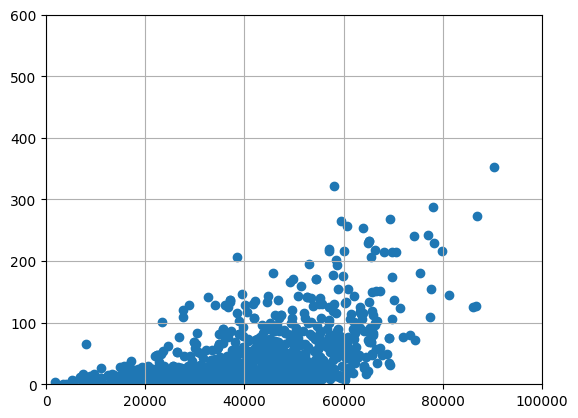

In [18]:
from matplotlib import pyplot as plt
plt.scatter(df['Income'], df['MntMeatProducts']) #posicionamento dos eixos x e y
plt.xlim(0,100000) #range do eixo x
plt.ylim(0,600) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico
plt.show()

### copias e filtros

In [19]:
df = df.filter(items=['Education','Marital_Status_2', 'Marital_Status_3', 'Income', 'MntWines', 'MntMeatProducts','Recency','Kidhome']) ## pode acrescentar 'Age'
### Realizando uma cópia do data frame para ser usado por outros algoritmos
# df = df.filter(items=['Marital_Status_1', 'Income', 'MntWines', 'MntMeatProducts','Recency','Kidhome'])
dfh = df
dfd =df

## K_means

In [20]:
from sklearn.cluster import KMeans

modelo_kmeans = KMeans(n_clusters=3, n_init=10)
modelo_kmeans.fit(df)

KMeans(n_clusters=3, n_init=10)

In [21]:
centroides = modelo_kmeans.cluster_centers_

In [22]:
modelo_kmeans.n_clusters

3

In [23]:
labels = modelo_kmeans.labels_
labels

array([2, 0, 2, ..., 1, 1, 1], dtype=int32)

In [24]:
modelo_kmeans.n_iter_

5

In [25]:
#quanto menor a inertia mais próximo os elementos estão dos seus centróides
modelo_kmeans.inertia_

46979670810.929565

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i in range(2, 11):
    clusterer = KMeans(n_clusters=i)
    preds = clusterer.fit_predict(df)
    score = silhouette_score(df, preds)
    print('Silhueta para ' + str(i) + ' clusters : ' + str(score))

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhueta para 2 clusters : 0.5718450775578429


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhueta para 3 clusters : 0.5439862590715977


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhueta para 4 clusters : 0.5345806996118891


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhueta para 5 clusters : 0.5211544311703804


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhueta para 6 clusters : 0.5237670309934445


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhueta para 7 clusters : 0.5213225846974575


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhueta para 8 clusters : 0.5338009597230495


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhueta para 9 clusters : 0.5335117867657388


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhueta para 10 clusters : 0.5351537540172498


### encontrar melhor n de cluster

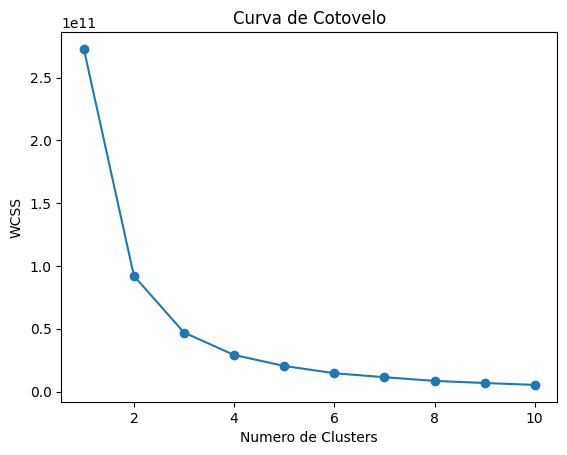

In [27]:
import matplotlib.pyplot as plt

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Mostra o Gráfico
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('Curva de Cotovelo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [28]:
df['cluster']=labels

### testando as colunas para saber se são significativas

In [29]:
# max = len(centroides[0])
# for i in range(max):
#   print(df.columns.values[i]," - {:.2f}".format(centroides[:,i].std()))

In [30]:
# ## novo Df com as colunas mais relevantes
# colunaSignificativa = ['Marital_Status_2', 'Marital_Status_3', 'Income', 'MntWines', 'MntMeatProducts','Recency']
# df2 = df[colunaSignificativa].copy()
# df2

In [31]:
# from sklearn.cluster import KMeans

# modelo_kmeans = KMeans(n_clusters=3, n_init=10)
# modelo_kmeans.fit(df2)

In [32]:
# novoscentroides = modelo_kmeans.cluster_centers_

In [33]:
# modelo_kmeans.n_clusters

In [34]:
# modelo_kmeans.n_iter_

In [35]:
# modelo_kmeans.inertia_

In [36]:
# from sklearn.metrics import silhouette_samples, silhouette_score

# for i in range(2, 11):
#     clusterer = KMeans(n_clusters=i)
#     preds = clusterer.fit_predict(df2)
#     score = silhouette_score(df2, preds)
#     print('Silhueta para ' + str(i) + ' clusters : ' + str(score))

### plotando gráficos


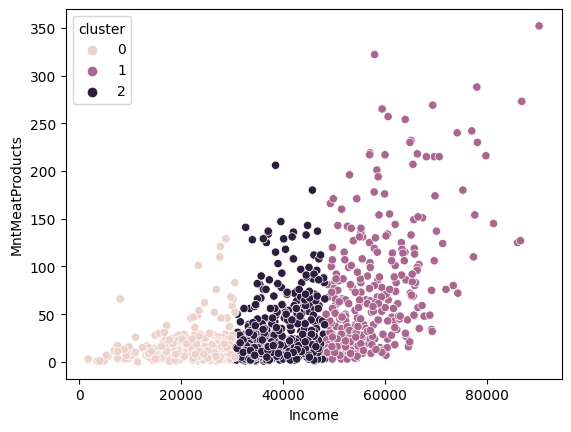

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=df.Income, y=df.MntMeatProducts, hue=df.cluster)
plt.show()

In [38]:
df.cluster.value_counts()

cluster
2    530
0    382
1    339
Name: count, dtype: int64

### Interpretando os resultados do K-means

In [39]:
#dados do k-means
#descrição de cada cluster
df.groupby('cluster').describe()

Education                                               \
            count      mean       std  min  25%  50%  75%  max   
cluster                                                          
0           382.0  1.520942  1.133286  0.0  1.0  1.0  2.0  4.0   
1           339.0  2.637168  1.312628  1.0  1.0  3.0  4.0  4.0   
2           530.0  2.188679  1.260969  0.0  1.0  2.0  3.0  4.0   

        Marital_Status_2            ... Recency       Kidhome            \
                   count      mean  ...     75%   max   count      mean   
cluster                             ...                                   
0                  382.0  0.267016  ...    75.0  99.0   382.0  0.798429   
1                  339.0  0.253687  ...    74.5  98.0   339.0  0.383481   
2                  530.0  0.256604  ...    74.0  99.0   530.0  0.796226   

                                            
              std  min  25%  50%  75%  max  
cluster                                     
0        0.479170  0.0  1.0  1.0  1.0  2.0  
1        0.544329  0.0  0.0  0.0  1.0  2.0  
2        0.491886  0.0  1.0  1.0  1.0  2.0  

[3 rows x 64 columns]

In [40]:
centroids = modelo_kmeans.cluster_centers_
#Identifica quais são as colunas mais significativas na clusterização a partir do desvio padrão.
#O desvio padrão está sendo calculado a partir dos centróides de cada cluster
max = len(centroids[0])
for i in range(max):
  print(df.columns.values[i]," - {:.2f}".format(centroids[:,i].std()))

Education  - 0.46
Marital_Status_2  - 0.01
Marital_Status_3  - 0.01
Income  - 14482.38
MntWines  - 147.54
MntMeatProducts  - 24.61
Recency  - 0.36
Kidhome  - 0.20


In [41]:
#seleciona somente as colunas com maior desvio padrão
#desvio padrão menor indica que não há grande diferença entre um cluster e outro naquela coluna
description = df.groupby('cluster')[['Education','Income','MntWines','MntMeatProducts','Kidhome']]

n_registro = description.size()

description = description.mean()

description['n_registro'] = n_registro

description

,Education,Income,MntWines,MntMeatProducts,Kidhome,n_registro
cluster,,,,,,
0,1.520942,22265.811518,14.609948,14.869110,0.798429,382
1,2.637168,57723.095926,351.790560,73.041298,0.383481,339
2,2.188679,39038.813208,70.556604,30.243396,0.796226,530


Cluster 0: caracterizam pessoas com a maior renda, maior nivel de escolaridade,compram mais carne e vinho e possui uma quantidade menor de filhos:

Cluster 1: caracterizam pessoas com escolaridade, renda intermediaria e maior quantidade de filhos

Cluster 2: caracterizam pessoas com menor renda, escolaridade; e compram uma menor quantidade de carne e vinho 


## Hierárquica

In [42]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(
    n_clusters=3,#o default é 2
    linkage='complete',#{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’
)
clustering.fit(dfh)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [43]:
labels=clustering.labels_

In [44]:
clustering.n_leaves_

1251

In [45]:
score = silhouette_score(dfh, labels)
score

0.46531587177871775

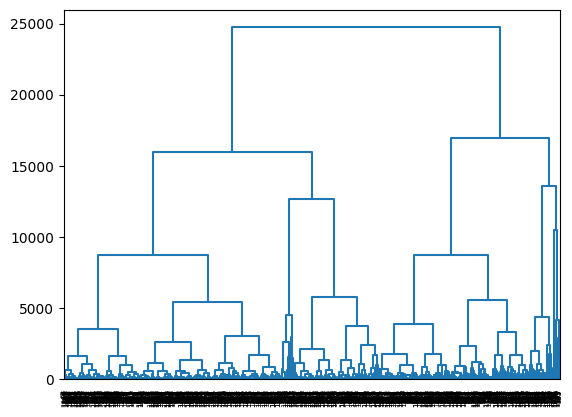

<Figure size 5000x5000 with 0 Axes>

In [46]:
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

#A função linkage aplica o agrupamento hierárquico, onde o parâmetro method define o tipo de linkagem (average, complete, single, ward)
# e o parâmetro metric define a medida de distância outras medidas de distância podem ser vistas em https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
#No dendrograma o color_threshold é o valor da distância entre os elementos para colorir os que participarem do mesmo cluster a partir da distância dada

h = linkage(dfh, method='centroid', metric='euclidean')
x = dendrogram(h,color_threshold=3,orientation='top')
plt.figure(figsize=(50,50))
plt.show()

In [47]:
# #o método fcluster recebe o resultado da hierarquia gerada e extrai os grupo segundo algum criterio t
# #A variável rotulos será um array onde o valor contido indica o rótulo do grupo que aquele elemento pertence
# #https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html?highlight=fcluster
# labels = fcluster(h,t=1.8, criterion='distance')
# # labels

In [48]:
dfh['cluster'] = labels
print(dfh.cluster.nunique())
print(dfh.cluster.value_counts())

3
cluster
1    774
2    263
0    214
Name: count, dtype: int64


<Axes: xlabel='Income', ylabel='MntMeatProducts'>

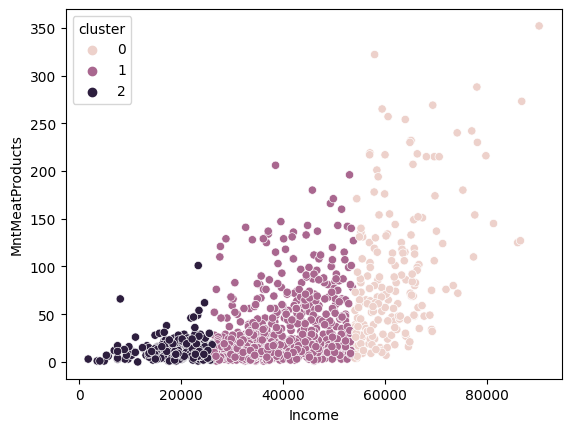

In [49]:
import seaborn as sns
sns.scatterplot(x='Income',y='MntMeatProducts', hue=dfh.cluster,data=dfh)


### Interpretando Hierárquico

In [50]:
dfh.groupby('cluster').describe()

Education                                               \
            count      mean       std  min  25%  50%  75%  max   
cluster                                                          
0           214.0  2.747664  1.286210  1.0  1.0  3.0  4.0  4.0   
1           774.0  2.177003  1.280135  0.0  1.0  2.0  3.0  4.0   
2           263.0  1.376426  1.055219  0.0  1.0  1.0  2.0  4.0   

        Marital_Status_2            ... Recency       Kidhome            \
                   count      mean  ...     75%   max   count      mean   
cluster                             ...                                   
0                  214.0  0.266355  ...   73.75  98.0   214.0  0.322430   
1                  774.0  0.259690  ...   74.00  99.0   774.0  0.757106   
2                  263.0  0.250951  ...   76.00  99.0   263.0  0.768061   

                                            
              std  min  25%  50%  75%  max  
cluster                                     
0        0.534062  0.0  0.0  0.0  1.0  2.0  
1        0.509084  0.0  0.0  1.0  1.0  2.0  
2        0.489788  0.0  0.0  1.0  1.0  2.0  

[3 rows x 64 columns]

In [51]:
#calcular um centroide para cada cluster
#observação: o hierárquico não trabalha com centróides mas vamos escolher um representante para caracterizar o cluster
id_clusters = dfh.cluster.unique()
centroids = []
for i in id_clusters:
  centroids.append(dfh.loc[(dfh['cluster'])==i].mean())

centroids = np.array(centroids)
centroids = centroids[:,:-1] #retira a coluna de cluster
centroids

array([[2.17700258e+00, 2.59689922e-01, 3.74677003e-01, 3.93699128e+04,
        8.54573643e+01, 3.13074935e+01, 4.85478036e+01, 7.57105943e-01],
       [1.37642586e+00, 2.50950570e-01, 4.10646388e-01, 1.93953270e+04,
        1.00038023e+01, 1.25437262e+01, 5.01482890e+01, 7.68060837e-01],
       [2.74766355e+00, 2.66355140e-01, 4.25233645e-01, 6.16399860e+04,
        4.36719626e+02, 8.85000000e+01, 4.83224299e+01, 3.22429907e-01]])

In [52]:
#Identifica quais são as colunas mais significativas na clusterização a partir do desvio padrão.
#O desvio padrão está sendo calculado a partir dos centróides de cada cluster
max = len(centroids[0])
for i in range(max):
  print(dfh.columns.values[i]," - {:.2f}".format(centroids[:,i].std()))

Education  - 0.56
Marital_Status_2  - 0.01
Marital_Status_3  - 0.02
Income  - 17254.79
MntWines  - 185.94
MntMeatProducts  - 32.30
Recency  - 0.81
Kidhome  - 0.21


In [53]:
#seleciona somente as colunas com maior desvio padrão
#desvio padrão menor indica que não há grande diferença entre um cluster e outro naquela coluna
description = df.groupby('cluster')[['Education','Income','MntWines','MntMeatProducts','Kidhome']]

n_registro = description.size()

description = description.mean()

description['n_registro'] = n_registro

description

,Education,Income,MntWines,MntMeatProducts,Kidhome,n_registro
cluster,,,,,,
0,2.747664,61639.985981,436.719626,88.500000,0.322430,214
1,2.177003,39369.912815,85.457364,31.307494,0.757106,774
2,1.376426,19395.326996,10.003802,12.543726,0.768061,263


Interpretação dos resultados
Cluster 0: caracterizam pessoas com a maior renda, maior nivel de escolaridade,compram mais carne e vinho e possui uma quantidade menor de filhos:

Cluster 1: caracterizam pessoas com escolaridade, renda intermediaria e maior quantidade de filhos

Cluster 2: caracterizam pessoas com menor renda, escolaridade; e compram uma menor quantidade de carne e vinho 


## Densidade

In [54]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.58, min_samples=3, )
db.fit(dfd)

DBSCAN(eps=0.58, min_samples=3)

In [55]:
labels = db.labels_
labels

array([-1, -1, -1, ..., -1, -1, -1])

In [56]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

6

In [57]:
score = silhouette_score(dfd, labels)
score

-0.7209381015904668

In [58]:
n_noise_ = list(labels).count(-1)
n_noise_

1232

In [59]:
dfd['cluster'] = labels

<Axes: xlabel='Income', ylabel='MntMeatProducts'>

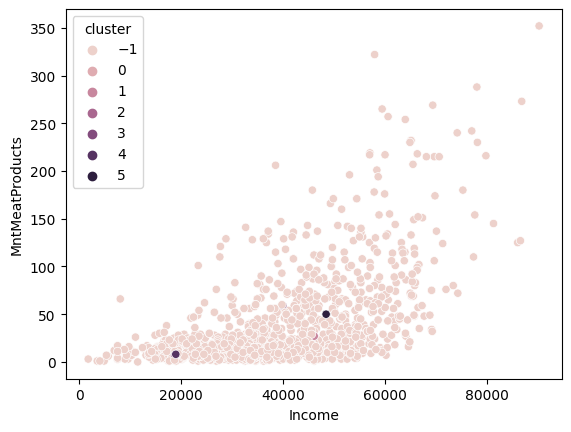

In [60]:
import seaborn as sns
sns.scatterplot(x='Income',y='MntMeatProducts', hue=dfd.cluster,data=dfd)

In [61]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1251 entries, 1 to 2239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Education         1251 non-null   float64
 1   Marital_Status_2  1251 non-null   int64  
 2   Marital_Status_3  1251 non-null   int64  
 3   Income            1251 non-null   float64
 4   MntWines          1251 non-null   int64  
 5   MntMeatProducts   1251 non-null   int64  
 6   Recency           1251 non-null   int64  
 7   Kidhome           1251 non-null   int64  
 8   cluster           1251 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 97.7 KB


In [62]:
dfd.groupby('cluster').describe()


Education                                               \
            count      mean       std  min  25%  50%  75%  max   
cluster                                                          
-1         1232.0  2.101461  1.307455  0.0  1.0  1.5  3.0  4.0   
 0            4.0  4.000000  0.000000  4.0  4.0  4.0  4.0  4.0   
 1            3.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0   
 2            3.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
 3            3.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
 4            3.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
 5            3.0  4.000000  0.000000  4.0  4.0  4.0  4.0  4.0   

        Marital_Status_2            ... Recency       Kidhome          \
                   count      mean  ...     75%   max   count    mean   
cluster                             ...                                 
-1                1232.0  0.262987  ...    75.0  99.0  1232.0  0.6875   
 0                   4.0  0.000000  ...    37.0  37.0     4.0  1.0000   
 1                   3.0  0.000000  ...    86.0  86.0     3.0  1.0000   
 2                   3.0  0.000000  ...    77.0  77.0     3.0  0.0000   
 3                   3.0  0.000000  ...    30.0  30.0     3.0  1.0000   
 4                   3.0  0.000000  ...    15.0  15.0     3.0  0.0000   
 5                   3.0  0.000000  ...     3.0   3.0     3.0  0.0000   

                                            
              std  min  25%  50%  75%  max  
cluster                                     
-1       0.535262  0.0  0.0  1.0  1.0  2.0  
 0       0.000000  1.0  1.0  1.0  1.0  1.0  
 1       0.000000  1.0  1.0  1.0  1.0  1.0  
 2       0.000000  0.0  0.0  0.0  0.0  0.0  
 3       0.000000  1.0  1.0  1.0  1.0  1.0  
 4       0.000000  0.0  0.0  0.0  0.0  0.0  
 5       0.000000  0.0  0.0  0.0  0.0  0.0  

[7 rows x 64 columns]

In [63]:
#calcular um centroide para cada cluster
#observação: o algoritmo de densidade não trabalha com centróides mas vamos escolher um representante para caracterizar o cluster
id_clusters = dfd.cluster.unique()
#id_clusters = id_clusters.remove(-1)
centroids = []
for i in id_clusters:
  centroids.append(dfd.loc[(dfd['cluster'])==i].mean())

centroids = np.array(centroids)
centroids = centroids[:,:-1] #retira a coluna de cluster
centroids

array([[2.10146104e+00, 2.62987013e-01, 3.89610390e-01, 3.90459314e+04,
        1.30547890e+02, 3.73254870e+01, 4.89650974e+01, 6.87500000e-01],
       [4.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.58600000e+04,
        1.50000000e+01, 8.00000000e+00, 3.70000000e+01, 1.00000000e+00],
       [3.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.60980000e+04,
        5.70000000e+01, 2.70000000e+01, 8.60000000e+01, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.86900000e+04,
        6.00000000e+00, 7.00000000e+00, 7.70000000e+01, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.99220000e+04,
        2.90000000e+01, 5.90000000e+01, 3.00000000e+01, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.89290000e+04,
        3.20000000e+01, 8.00000000e+00, 1.50000000e+01, 0.00000000e+00],
       [4.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.84320000e+04,
        3.22000000e+02, 5.00000000e+01, 3.00000000e+00, 0.

In [64]:
#Identifica quais são as colunas mais significativas na clusterização a partir do desvio padrão.
#O desvio padrão está sendo calculado a partir dos centróides de cada cluster
max = len(centroids[0])
for i in range(max):
  print(dfd.columns.values[i]," - {:.2f}".format(centroids[:,i].std()))

Education  - 1.28
Marital_Status_2  - 0.09
Marital_Status_3  - 0.46
Income  - 11139.72
MntWines  - 104.27
MntMeatProducts  - 19.91
Recency  - 28.35
Kidhome  - 0.47


In [65]:
#seleciona somente as colunas com maior desvio padrão
#desvio padrão menor indica que não há grande diferença entre um cluster e outro naquela coluna
description = df.groupby('cluster')[['Education','Income','MntWines','MntMeatProducts','Kidhome']]

n_registro = description.size()

description = description.mean()

description['n_registro'] = n_registro

description

,Education,Income,MntWines,MntMeatProducts,Kidhome,n_registro
cluster,,,,,,
-1,2.101461,39045.931428,130.54789,37.325487,0.6875,1232
0,4.000000,35860.000000,15.00000,8.000000,1.0000,4
1,3.000000,46098.000000,57.00000,27.000000,1.0000,3
2,1.000000,18690.000000,6.00000,7.000000,0.0000,3
3,1.000000,39922.000000,29.00000,59.000000,1.0000,3
4,1.000000,18929.000000,32.00000,8.000000,0.0000,3
5,4.000000,48432.000000,322.00000,50.000000,0.0000,3


O algoritmo por densidade não retornou resultados signifcativos

## Resultados

Ambos os algoritmos K-means e Hieráquico retornaram resultados bastante semelhante. Já a clusterização por densidade não retornou resultados significativos